**MyDBSCAN** **CODE**

In [0]:


import numpy 

def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels




In [0]:
def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!




In [0]:
def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
#from dbscan import MyDBSCAN

# Create three gaussian blobs to use as our clustering data.
#centers = [[1, 0],[-1, 0]]
X, labels_true = make_blobs(n_samples=3000,centers=2, cluster_std=0.9,
                            random_state=0)

X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
print(X[1:5,:])

[[-0.4655398   0.84942469]
 [-0.28853989 -1.64503686]
 [-0.02821516 -1.2425815 ]
 [ 0.93332378  0.16240623]]


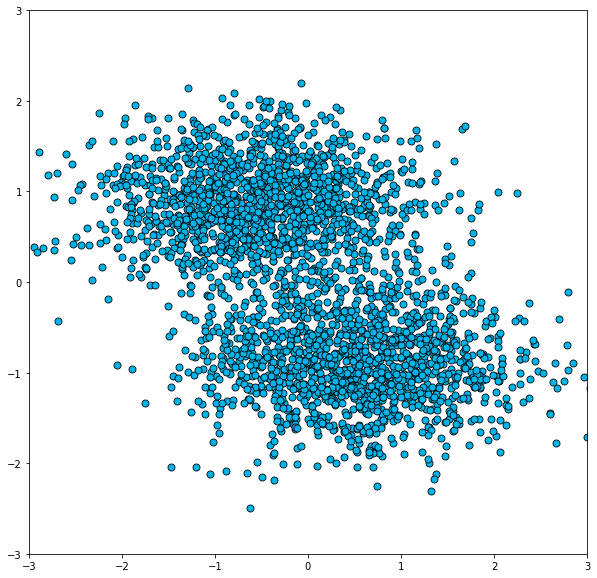

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from itertools import cycle, islice
from sklearn import cluster

figsize = (10,10)
point_size=50
point_border=0.8
def plot_dataset(dataset, xlim=(-15, 15), ylim=(-15, 15)):
    plt.figure(figsize=figsize)
    plt.scatter(dataset[:,0], dataset[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

plot_dataset(X,(-3,3),(-3,3))

Running my implementation...


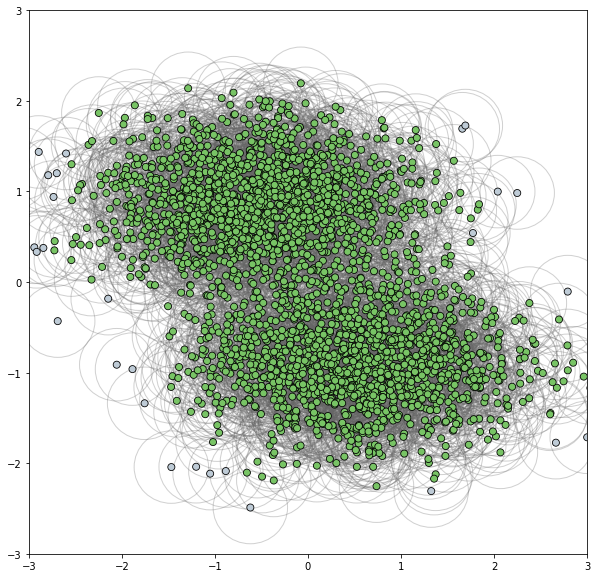

In [0]:

###############################################################################
# My implementation of DBSCAN
#
def plot_clustered_dataset(dataset, y_pred, xlim=(-15, 15), ylim=(-15, 15), neighborhood=False, epsilon=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=point_size, color=colors[y_pred], zorder=10, edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()



# Run my DBSCAN implementation.
print ('Running my implementation...')
my_labels = MyDBSCAN(X, eps=0.4, MinPts=20)
plot_clustered_dataset(X, my_labels,(-3,3),(-3,3), neighborhood=True,epsilon=0.4)








###############################################################################
    

In [0]:


MyNeighbors=[]
import csv
with open('dataset4.csv','w',newline='') as file:
    writer=csv.writer(file)
    writer.writerows(X)
data_4=pd.read_csv('dataset4.csv',header=None)

for P in range(0,len(data_4)):
    c=regionQuery(X, P, eps=0.4)
    MyNeighbors.append(len(c))
data_4["neighbors"]=MyNeighbors 
data_4["cluster"]=my_labels
    
print(data_4)

             0         1  neighbors  cluster
0    -0.544797  0.557762        219        1
1    -0.465540  0.849425        258        1
2    -0.288540 -1.645037         50        1
3    -0.028215 -1.242581        175        1
4     0.933324  0.162406         64        1
...        ...       ...        ...      ...
2995 -0.091019 -0.774266        188        1
2996 -0.275479  1.389873        175        1
2997 -1.023519 -0.949331         65        1
2998 -0.023242  1.230209        198        1
2999 -1.028457 -0.055735         58        1

[3000 rows x 4 columns]


In [0]:
numpy. set_printoptions(threshold=20)
print(data_4)
# number of outliers and core points
print(data_4.cluster.value_counts())

#remove outliers
core=data_4.query("cluster!=-1")
print(core.cluster.value_counts())


             0         1  neighbors  cluster
0    -0.544797  0.557762        219        1
1    -0.465540  0.849425        258        1
2    -0.288540 -1.645037         50        1
3    -0.028215 -1.242581        175        1
4     0.933324  0.162406         64        1
...        ...       ...        ...      ...
2995 -0.091019 -0.774266        188        1
2996 -0.275479  1.389873        175        1
2997 -1.023519 -0.949331         65        1
2998 -0.023242  1.230209        198        1
2999 -1.028457 -0.055735         58        1

[3000 rows x 4 columns]
 1    2968
-1      32
Name: cluster, dtype: int64
1    2968
Name: cluster, dtype: int64


In [0]:
print(core.neighbors.value_counts()) 

255    24
258    24
184    23
179    22
257    21
       ..
274     1
271     1
5       1
269     1
6       1
Name: neighbors, Length: 271, dtype: int64


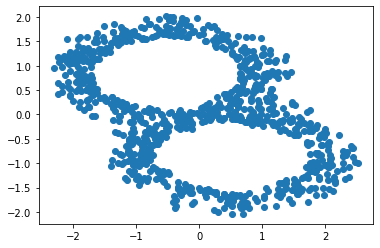

In [0]:
bp=core.query("neighbors<110 and neighbors>20")
plt.scatter(bp[0],bp[1])

In [0]:
bp["cluster"]=7
print(bp)

#array21=df77.drop(["minpts","cluster"],axis=1).to_numpy()
#array11=df71.drop(["minpts","cluster"],axis=1).to_numpy()


             0         1  neighbors  cluster
2    -0.288540 -1.645037         50        7
4     0.933324  0.162406         64        7
11   -0.115656 -0.175040        100        7
12    0.481923  0.383927         90        7
13   -0.852046 -0.988906         95        7
...        ...       ...        ...      ...
2989 -1.131550 -0.741620         58        7
2992  0.693281  0.652574         98        7
2993 -2.129425  0.809039         47        7
2997 -1.023519 -0.949331         65        7
2999 -1.028457 -0.055735         58        7

[901 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


361


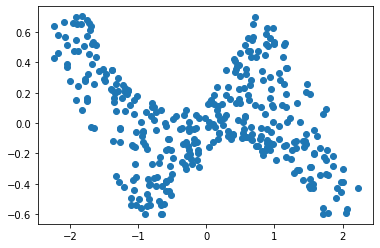

In [0]:

nbp=0.0
yd=0.0
arrn=[]
arrnx=[]

arrny=[]
for a,b in bp.iterrows():
    up=0
    dn=0
    for c,d in bp.iterrows():
      yd=b[1]-d[1]
      if yd<0:

        up=up+1

      elif yd>0:

          dn=dn+1
    #print(up)
    #print(dn)
    if  abs(up-dn)<=(.4*len(bp)):


      nbp=nbp+1
        
        #print(item)
      arrn.append(a)
      arrnx.append(b[0])
    
      arrny.append(b[1])
     

print(len(arrn))

plt.scatter(arrnx,arrny)

    
        
       

#helper.plot_dataset(arrn,(-3,3),(-3,3))
#helper.plot_dataset(array21,(-3,3),(-3,3))

In [0]:
 #alloting cluster=8 to problematic boundary points
 for a,b in bp.iterrows():
   for i in arrn:
     if(i==a):
       
       bp["cluster"][a]=8
print(bp.cluster.value_counts())
#dataframe for problematic boundary point 
pbp=bp.query("cluster!=7")
print(pbp.cluster.value_counts())


7    540
8    361
Name: cluster, dtype: int64
8    361
Name: cluster, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [0]:
 #alloting cluster=7,8 to data_4

for a,b in bp.iterrows():
   for i,j in data_4.iterrows():
     if(i==a):
       data_4["cluster"][a]=bp["cluster"][a]
#print(c)       
       #bp["cluster"][a]=8
print(data_4.cluster.value_counts())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


 1    2067
 7     540
 8     361
-1      32
Name: cluster, dtype: int64


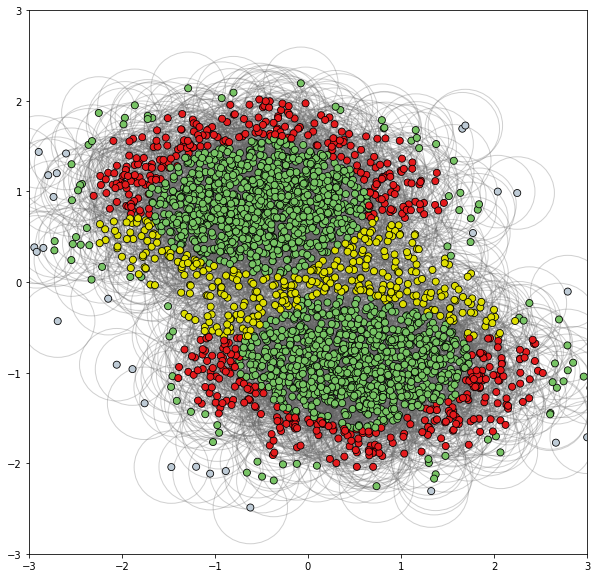

In [0]:
Y=data_4



lbl=data_4["cluster"]
Y=Y.drop(["neighbors","cluster"],axis=1).to_numpy()

plot_clustered_dataset(Y,lbl,(-3,3),(-3,3), neighborhood=True,epsilon=0.4)

In [0]:
nbp=0.0
yd=0.0
arrn=[]
arrnx=[]

arrny=[]
for a,b in data_4.iterrows():
    up=0
    dn=0
    if b["cluster"]!=8:

      for c,d in pbp.iterrows():
        yd=b[1]-d[1]
        if yd>0:

          up=up+1

        elif yd<0:

 
          dn=dn+1
    #print(up)
    #print(dn)
    
      if  up>dn:
        data_4["cluster"][a]=2
      else:
        data_4["cluster"][a]=3  


   


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


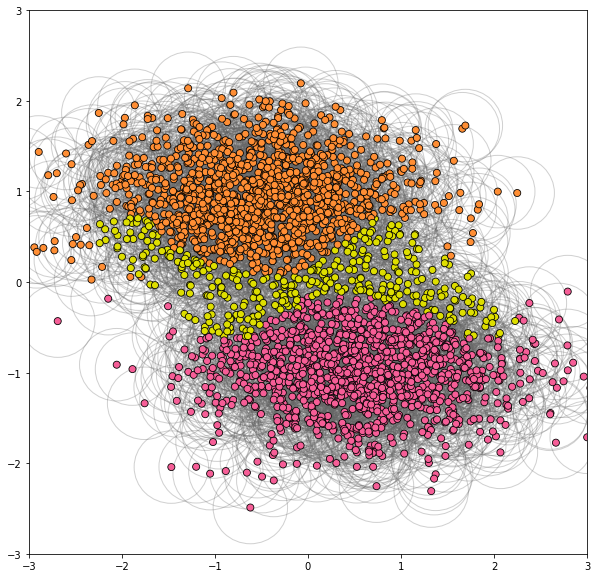

In [0]:
Y=data_4
lbl=data_4["cluster"]
Y=Y.drop(["neighbors","cluster"],axis=1).to_numpy()

plot_clustered_dataset(Y,lbl,(-3,3),(-3,3), neighborhood=True,epsilon=0.4)

In [0]:
new_core=data_4.query("cluster!=8")
new_core=new_core.sort_values("cluster")
new_core

,0,1,neighbors,cluster
0,-0.544797,0.557762,219,2
1657,-1.825331,0.922643,94,2
1656,-0.825495,0.937293,250,2
1654,-0.839642,0.515802,213,2
1653,-0.212891,0.247523,128,2
...,...,...,...,...
1943,1.035468,-1.893987,31,3
1941,-0.364154,-0.770362,158,3
521,0.581087,-0.781850,251,3
523,-0.070532,-0.865939,205,3


In [0]:
Y=new_core
lbl=new_core["cluster"]
Y=Y.drop(["neighbors","cluster"],axis=1).to_numpy()

In [0]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np
lbl_arr=np.array(lbl)
clf = NearestCentroid()
clf.fit(Y, lbl)

centroids=clf.centroids_
c2=centroids[0]
c3=centroids[1]
print(c2)

[-0.52199753  0.96805557]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from scipy.spatial import distance




for i,j in data_4.iterrows():
  point=[]
  if j["cluster"]==8:
    point.append(j[0])
    point.append(j[1])
    dst2 = distance.euclidean(point,c2) 
    dst3 = distance.euclidean(point,c3) 
    if dst2>dst3:
      data_4["cluster"][i]=3
    else:
      data_4["cluster"][i]=2
print(data_4.cluster.value_counts())        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


2    1522
3    1478
Name: cluster, dtype: int64


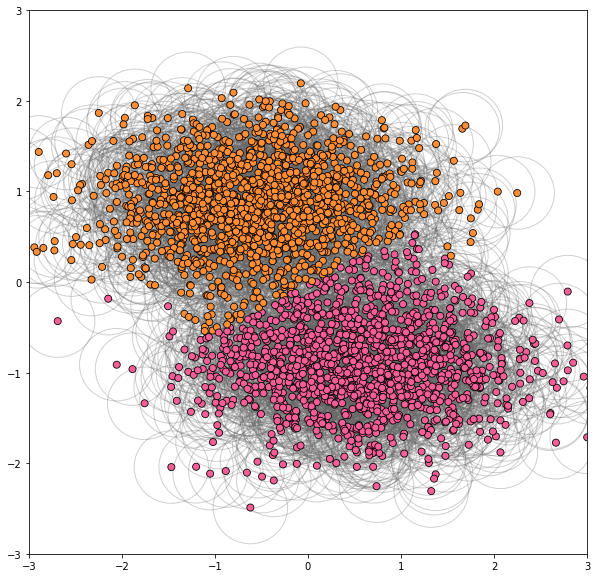

Silhouette Coefficient: 0.485


In [0]:
Y=data_4
lbl=data_4["cluster"]
Y=Y.drop(["neighbors","cluster"],axis=1).to_numpy()

plot_clustered_dataset(Y,lbl,(-3,3),(-3,3), neighborhood=True,epsilon=0.4)
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Y,lbl))

In [0]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, lbl))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, lbl))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, lbl))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, lbl))
print("Adjusted Mutual Information: %0.3f"5
      % metrics.adjusted_mutual_info_score(labels_true, lbl))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Y, lbl))

Homogeneity: 0.790
Completeness: 0.790
V-measure: 0.790
Adjusted Rand Index: 0.871
Adjusted Mutual Information: 0.790
Silhouette Coefficient: 0.485


In [0]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, my_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, my_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, my_labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, my_labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, my_labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, my_labels))


Homogeneity: -0.000
Completeness: -0.000
V-measure: -0.000
Adjusted Rand Index: -0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.408
